In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
directory = "remove_initialisation_effects/"
stats = pd.read_hdf(directory+"stats.h5")

In [4]:
stats.head()

,Epoch,Mass Loss,Force Loss,Mass Train Accuracy,Mass Val Accuracy,Force Train Accuracy,Force Val Accuracy,seed
0,0,1.105159,1.105389,32.542857,32.1,33.171429,34.7,0
1,1,1.101487,1.098144,34.000000,33.0,37.628571,36.1,0
2,2,1.101712,1.088670,33.285714,36.4,41.285714,40.3,0
3,3,1.099736,1.068978,36.114286,33.3,45.600000,43.4,0
4,4,1.098742,1.055423,37.171429,33.5,45.542857,42.1,0


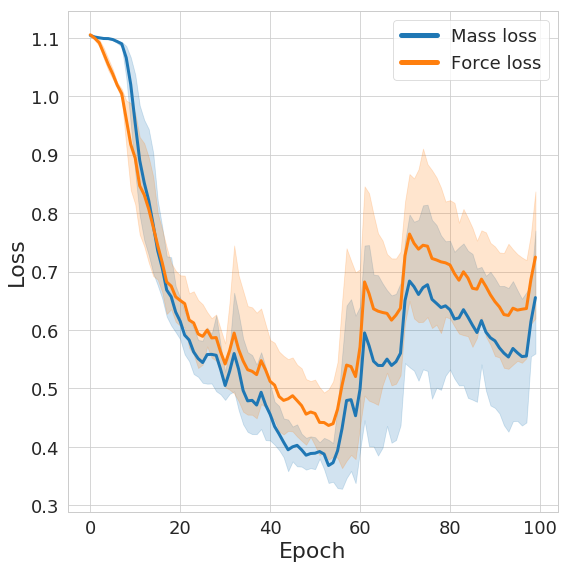

In [5]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Loss", data=stats, label="Mass loss")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Loss", data=stats, ax=ax, label="Force loss")
plt.ylabel("Loss")
plt.savefig(directory+"losses.pdf")

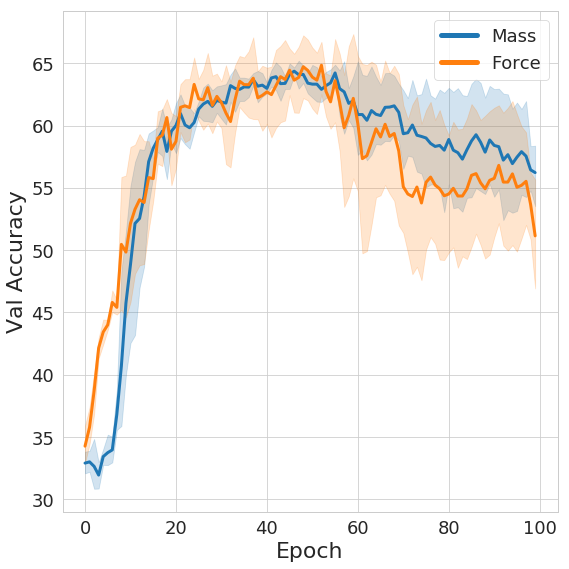

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Val Accuracy", data=stats, label="Mass")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Val Accuracy", data=stats, ax=ax, label="Force")
plt.ylabel("Val Accuracy")
plt.savefig(directory+"val_accuracies.pdf")

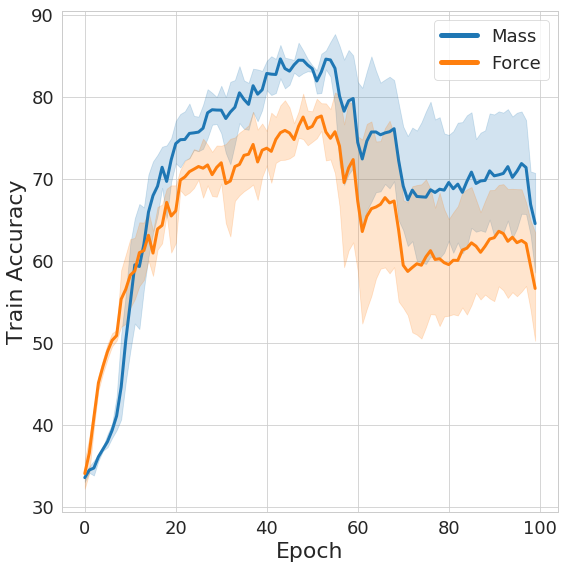

In [7]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Train Accuracy", data=stats, label="Mass")
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Train Accuracy", ax=ax, data=stats, label="Force")
plt.ylabel("Train Accuracy")
plt.savefig(directory+"train_accuracies.pdf")

In [8]:
mass_accuracies = []
force_accuracies = []

for _, seed_df in stats.groupby("seed"):
    mass_accuracies.append(seed_df["Mass Val Accuracy"].max())
    force_accuracies.append(seed_df["Force Val Accuracy"].max())

print("Mass", np.mean(mass_accuracies), np.std(mass_accuracies))
print("Force", np.mean(force_accuracies), np.std(force_accuracies))

Mass 65.76 0.9728309205612218
Force 66.85999999999999 2.7810789273229926
